In [1]:
#Import code from last time
%run k2-4.ipynb

         Current function value: 0.114174
         Iterations: 100
         Function evaluations: 113
         Gradient evaluations: 113


<Figure size 640x480 with 1 Axes>

         Current function value: 0.094898
         Iterations: 100
         Function evaluations: 114
         Gradient evaluations: 114


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [2]:
testX

array([[0.58322864, 0.48171501],
       [0.48171501, 0.44281211],
       [0.44281211, 0.49627058],
       [0.49627058, 0.47546339],
       [0.47546339, 0.55155979],
       [0.55155979, 0.50099435],
       [0.50099435, 0.44545859],
       [0.44545859, 0.50571167],
       [0.50571167, 0.46588904],
       [0.46588904, 0.46785659],
       [0.46785659, 0.45300142],
       [0.45300142, 0.43741172],
       [0.43741172, 0.3506737 ]])

In [3]:
testY

array([[0.44281211],
       [0.49627058],
       [0.47546339],
       [0.55155979],
       [0.50099435],
       [0.44545859],
       [0.50571167],
       [0.46588904],
       [0.46785659],
       [0.45300142],
       [0.43741172],
       [0.3506737 ],
       [0.36403131]])

In [4]:
trainX

array([[0.        , 0.051925  ],
       [0.051925  , 0.14831904],
       [0.14831904, 0.11211342],
       [0.11211342, 0.17073406],
       [0.17073406, 0.2232566 ],
       [0.2232566 , 0.24197469],
       [0.24197469, 0.36573346],
       [0.36573346, 0.55255899],
       [0.55255899, 0.37002352],
       [0.37002352, 0.3325317 ],
       [0.3325317 , 0.38788752],
       [0.38788752, 0.39836394],
       [0.39836394, 0.2848263 ],
       [0.2848263 , 0.18673502],
       [0.18673502, 0.18269477],
       [0.18269477, 0.255617  ],
       [0.255617  , 0.23597043],
       [0.23597043, 0.16413413],
       [0.16413413, 0.17817663],
       [0.17817663, 0.1639561 ],
       [0.1639561 , 0.13324148],
       [0.13324148, 0.22639902],
       [0.22639902, 0.25501386],
       [0.25501386, 0.23708614],
       [0.23708614, 0.23165112],
       [0.23165112, 0.23306761],
       [0.23306761, 0.22117372],
       [0.22117372, 0.22633168],
       [0.22633168, 0.21869864],
       [0.21869864, 0.2320322 ],
       [0.

In [5]:
trainY

array([[0.14831904],
       [0.11211342],
       [0.17073406],
       [0.2232566 ],
       [0.24197469],
       [0.36573346],
       [0.55255899],
       [0.37002352],
       [0.3325317 ],
       [0.38788752],
       [0.39836394],
       [0.2848263 ],
       [0.18673502],
       [0.18269477],
       [0.255617  ],
       [0.23597043],
       [0.16413413],
       [0.17817663],
       [0.1639561 ],
       [0.13324148],
       [0.22639902],
       [0.25501386],
       [0.23708614],
       [0.23165112],
       [0.23306761],
       [0.22117372],
       [0.22633168],
       [0.21869864],
       [0.2320322 ],
       [0.23194795],
       [0.22154782],
       [0.28795858],
       [0.28837327],
       [0.29714576],
       [0.24366982],
       [0.30743731],
       [0.35859786],
       [0.37218122],
       [0.45025948],
       [0.44309563],
       [0.55815598],
       [0.60235983],
       [0.69629172],
       [0.79060467],
       [0.64402223],
       [0.58322864],
       [0.48171501]])

In [6]:
#Regularization Parameter:
Lambda = 0.0001

In [7]:
#Need to make changes to costFunction and costFunctionPrim:
def costFunction(self, X, y):
    #Compute cost for given X,y, use weights already stored in class.
    self.yHat = self.forward(X)
    #We don't want cost to increase with the number of examples, so normalize by dividing the error term by number of examples(X.shape[0])
    J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(sum(self.W1**2)+sum(self.W2**2))
    return J

def costFunctionPrime(self, X, y):
    #Compute derivative with respect to W and W2 for a given X and y:
    self.yHat = self.forward(X)

    delta3 = np.multiply(-(y-self.yHat), self.tanhPrime(self.z3))
    #Add gradient of regularization term:
    dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2

    delta2 = np.dot(delta3, self.W2.T)*self.tanhPrime(self.z2)
    #Add gradient of regularization term:
    dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1

    return dJdW1, dJdW2

In [8]:
#New complete class, with changes:
class Neural_Network(object):
    def __init__(self, Lambda=0.0001):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 4
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
        #Regularization Parameter:
        self.Lambda = Lambda
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.tanh(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.tanh(self.z3) 
        return yHat
        
    def tanh(self, z):
        # activation function
        return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
    
    def tanhPrime(self,z): 
        #derivative of tanh
        return 1-((np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z)))**2
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(np.sum(self.W1**2)+np.sum(self.W2**2))
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.tanhPrime(self.z3))
        #Add gradient of regularization term:
        dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2
        
        delta2 = np.dot(delta3, self.W2.T)*self.tanhPrime(self.z2)
        #Add gradient of regularization term:
        dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1
        
        return dJdW1, dJdW2
    
    def predict(self):
        prediksi = self.forward(dataprediksi)
        return prediksi
    
    #Helper functions for interacting with other methods/classes
    def getParams(self):
        #Get W1 and W2 Rolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single parameter vector:
        W1_start = 0
        W1_end = self.hiddenLayerSize*self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], \
                             (self.inputLayerSize, self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], \
                             (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [9]:
def computeNumericalGradient(N, X, y):
    paramsInitial = N.getParams()
    numgrad = np.zeros(paramsInitial.shape)
    perturb = np.zeros(paramsInitial.shape)
    e = 1e-4

    for p in range(len(paramsInitial)):
        #Set perturbation vector
        perturb[p] = e
        N.setParams(paramsInitial + perturb)
        loss2 = N.costFunction(X, y)
            
        N.setParams(paramsInitial - perturb)
        loss1 = N.costFunction(X, y)

        #Compute Numerical Gradient
        numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
        perturb[p] = 0
            
    #Return Params to original value:
    N.setParams(paramsInitial)

    return numgrad 

In [10]:
NN = Neural_Network(Lambda=0.0001)

In [11]:
#Make sure our gradients our correct after making changes:
numgrad = computeNumericalGradient(NN, X, y)
grad = NN.computeGradients(X,y)

In [12]:
#Should be less than 1e-8:
np.linalg.norm(grad-numgrad)/np.linalg.norm(grad+numgrad)

1.2967230005105805e-09

In [13]:
T = trainer(NN)

In [14]:
T.train(X,y,testX,testY)

         Current function value: 0.002177
         Iterations: 100
         Function evaluations: 107
         Gradient evaluations: 107


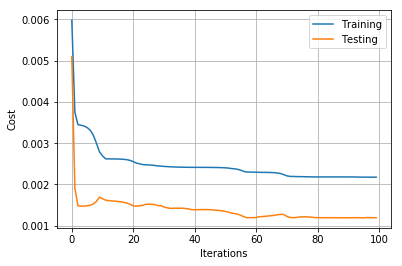

In [15]:
plot.plot(T.J)
plot.plot(T.testJ)
plot.grid(1)
plot.xlabel('Iterations')
plot.ylabel('Cost')
plot.legend(['Training', 'Testing'])
plot.show()

In [16]:
T.J

[array([0.00597887]),
 array([0.00374752]),
 array([0.00344946]),
 array([0.00343472]),
 array([0.00341505]),
 array([0.003379]),
 array([0.00331268]),
 array([0.00319438]),
 array([0.00300282]),
 array([0.00279192]),
 array([0.00269199]),
 array([0.00262207]),
 array([0.00261967]),
 array([0.00261912]),
 array([0.00261825]),
 array([0.00261669]),
 array([0.00261381]),
 array([0.0026085]),
 array([0.00259883]),
 array([0.00258177]),
 array([0.00255307]),
 array([0.00251791]),
 array([0.00250233]),
 array([0.00248235]),
 array([0.00247678]),
 array([0.00247331]),
 array([0.00246837]),
 array([0.0024605]),
 array([0.00244857]),
 array([0.00244384]),
 array([0.00243702]),
 array([0.00243283]),
 array([0.0024271]),
 array([0.00242514]),
 array([0.00242243]),
 array([0.00241914]),
 array([0.00241826]),
 array([0.0024169]),
 array([0.00241547]),
 array([0.00241488]),
 array([0.00241448]),
 array([0.00241434]),
 array([0.00241418]),
 array([0.00241392]),
 array([0.00241349]),
 array([0.002412

In [17]:
T.testJ

[array([0.00509411]),
 array([0.00191138]),
 array([0.0014836]),
 array([0.00147382]),
 array([0.0014752]),
 array([0.00148223]),
 array([0.00149696]),
 array([0.0015265]),
 array([0.00158866]),
 array([0.00169149]),
 array([0.00165459]),
 array([0.00161929]),
 array([0.00160872]),
 array([0.00160233]),
 array([0.00159538]),
 array([0.0015879]),
 array([0.00157861]),
 array([0.00156575]),
 array([0.00154688]),
 array([0.00151881]),
 array([0.00148047]),
 array([0.00147514]),
 array([0.00148459]),
 array([0.00149309]),
 array([0.0015174]),
 array([0.00152081]),
 array([0.00151802]),
 array([0.00151415]),
 array([0.00148562]),
 array([0.00148618]),
 array([0.00145204]),
 array([0.00143542]),
 array([0.0014197]),
 array([0.00142304]),
 array([0.00142611]),
 array([0.00142329]),
 array([0.00142476]),
 array([0.00141766]),
 array([0.00140737]),
 array([0.00138911]),
 array([0.00138809]),
 array([0.00138901]),
 array([0.00139097]),
 array([0.00139174]),
 array([0.00139081]),
 array([0.001387

In [18]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(T.J, T.testJ)

0.0010778466635135678

In [19]:
yHat=NN.forward(X)

In [20]:
yHat

array([[0.06453245],
       [0.17483234],
       [0.11721041],
       [0.19317132],
       [0.24667961],
       [0.26111449],
       [0.39268683],
       [0.54955375],
       [0.35946364],
       [0.3424448 ],
       [0.40443354],
       [0.40846429],
       [0.28637458],
       [0.18805481],
       [0.19697869],
       [0.28198234],
       [0.24986432],
       [0.16786713],
       [0.19476427],
       [0.17581905],
       [0.14074729],
       [0.2553397 ],
       [0.27553047],
       [0.25123101],
       [0.24739177],
       [0.24976052],
       [0.23580276],
       [0.24340274],
       [0.23384387],
       [0.25031774],
       [0.24841833],
       [0.2363903 ],
       [0.31291767],
       [0.30480873],
       [0.31442857],
       [0.25311104],
       [0.3313389 ],
       [0.37758881],
       [0.3854289 ],
       [0.46032541],
       [0.44502366],
       [0.54696578],
       [0.57135277],
       [0.63473224],
       [0.68594622],
       [0.58249777],
       [0.54847009],
       [0.466

In [21]:
y

array([[0.14831904],
       [0.11211342],
       [0.17073406],
       [0.2232566 ],
       [0.24197469],
       [0.36573346],
       [0.55255899],
       [0.37002352],
       [0.3325317 ],
       [0.38788752],
       [0.39836394],
       [0.2848263 ],
       [0.18673502],
       [0.18269477],
       [0.255617  ],
       [0.23597043],
       [0.16413413],
       [0.17817663],
       [0.1639561 ],
       [0.13324148],
       [0.22639902],
       [0.25501386],
       [0.23708614],
       [0.23165112],
       [0.23306761],
       [0.22117372],
       [0.22633168],
       [0.21869864],
       [0.2320322 ],
       [0.23194795],
       [0.22154782],
       [0.28795858],
       [0.28837327],
       [0.29714576],
       [0.24366982],
       [0.30743731],
       [0.35859786],
       [0.37218122],
       [0.45025948],
       [0.44309563],
       [0.55815598],
       [0.60235983],
       [0.69629172],
       [0.79060467],
       [0.64402223],
       [0.58322864],
       [0.48171501],
       [0.442

In [22]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y,yHat) 

0.004091740385017867

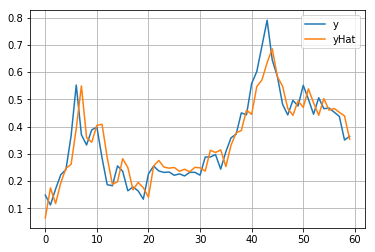

In [23]:
#Plot cost during training:
plot.plot(y)
plot.plot(yHat)
plot.grid(1)
plot.legend(['y', 'yHat'])
plot.show()

In [24]:
prediksi=NN.forward(dataprediksi)

In [25]:
prediksi

array([[0.37799227],
       [0.70823649],
       [0.77903738],
       [0.61089914]])

In [26]:
from sklearn.metrics import mean_squared_error 

In [27]:
Y_true= ([	0.795380412	]	,
[	1	]	,
[	0.707681705	]	,
[	0.491695324	]	,

)


Y_pred=prediksi
mean_squared_error(Y_true,Y_pred) 

0.06965999737462986

In [28]:
dataprediksi

array([[0.3506737 , 0.36403131],
       [0.36403131, 0.79538041],
       [0.79538041, 1.        ],
       [1.        , 0.70768171]])

In [29]:
a=np.array([	0.707681705	,	0.491695324	])

In [30]:
#prediksi 1
prediksi=NN.forward(a)
prediksi

array([0.46233257])

In [31]:
#prediksi 2
c=prediksi
b=a[1:]
d=np.concatenate((b,c))
prediksi=NN.forward(d)
prediksi

array([0.458628])

In [32]:
#prediksi 3
c=prediksi
b=d[1:]
e=np.concatenate((b,c))
prediksi=NN.forward(e)
prediksi

array([0.4583657])

In [33]:
#prediksi 4
c=prediksi
b=e[1:]
f=np.concatenate((b,c))
prediksi=NN.forward(f)
prediksi

array([0.45852403])

In [34]:
#prediksi 5
c=prediksi
b=f[1:]
g=np.concatenate((b,c))
prediksi=NN.forward(g)
prediksi

array([0.4587007])

In [35]:
#prediksi 6
c=prediksi
b=g[1:]
h=np.concatenate((b,c))
prediksi=NN.forward(h)
prediksi

array([0.45884867])

In [36]:
#prediksi 7
c=prediksi
b=g[1:]
i=np.concatenate((b,c))
prediksi=NN.forward(i)
prediksi

array([0.45898702])

In [37]:
#prediksi 8
c=prediksi
b=g[1:]
j=np.concatenate((b,c))
prediksi=NN.forward(j)
prediksi

array([0.45911635])

In [38]:
#prediksi 9
c=prediksi
b=g[1:]
k=np.concatenate((b,c))
prediksi=NN.forward(k)
prediksi

array([0.45923723])

In [39]:
#prediksi 10
c=prediksi
b=g[1:]
l=np.concatenate((b,c))
prediksi=NN.forward(l)
prediksi

array([0.45935018])

In [40]:
#prediksi 11
c=prediksi
b=g[1:]
m=np.concatenate((b,c))
prediksi=NN.forward(m)
prediksi

array([0.45945571])

In [41]:
#prediksi 12
c=prediksi
b=g[1:]
n=np.concatenate((b,c))
prediksi=NN.forward(n)
prediksi

array([0.4595543])